In [1]:
from katlas.common import *
import pandas as pd

from katlas.plot import *
from matplotlib import pyplot as plt

In [3]:
t5 = pd.read_parquet('raw/t5_kd.parquet')

In [4]:
pspa=pd.read_parquet('train/pspa_t5.parquet')

In [5]:
info=Data.get_kinase_info()

In [6]:
info = info[info.pseudo=='0']

In [7]:
info.kd_ID.str.len().sort_values()

518    20.0
32     20.0
28     20.0
27     20.0
497    20.0
       ... 
43      NaN
44      NaN
486     NaN
487     NaN
488     NaN
Name: kd_ID, Length: 462, dtype: float64

In [8]:
info=info.dropna(subset='kd_ID')

In [9]:
pspa_cat_map = info.set_index('kd_ID')['pspa_category_big']

In [10]:
idxs = (pspa_cat_map.value_counts()>=8)[lambda s: s].index
hue_map = pspa_cat_map[pspa_cat_map.isin(idxs)]

In [11]:
pspa = pspa.loc[:,pspa.columns.str.startswith('T5')]

In [12]:
embed_df=reduce_feature(pspa,method='UMAP',complexity=15,min_dist=0.2)

/home/sky1ove/git/katlas/.venv/lib/python3.11/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


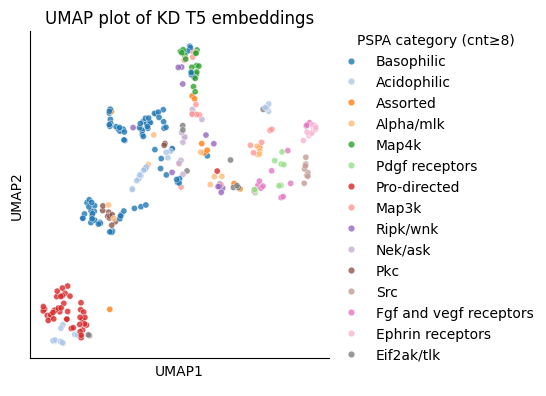

In [15]:
plot_2d(embed_df,hue=hue_map,
        legend=True,
        legend_title='PSPA category (cnt≥8)',height=4
        )
plt.title('UMAP plot of KD T5 embeddings')
save_svg('fig/umap_t5_pspa_category.svg')